# <center>Computer Vision</center>  <center>Spring 2022</center> 

## Filtering

+ **Neighborhood operations**<br/>
A sliding neighborhood operation is an operation that is performed a pixel at a time, with the value of any given pixel in the output image being determined by applying some algorithm to the values of the corresponding input pixel's neighborhood.

#### Importing required libraries

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [25]:
def flip(kernel):
    dim=kernel.shape
    row=dim[0]
    times=int(dim[0]/2) #this determine how many rows have to exchange and also columns
    for i in range(times):
        row=row-1
        #flipping horizontal
        for j in range(dim[0]):
            temp=kernel[i,j]
            kernel[i,j]=kernel[row,j]
            kernel[row,j]=temp
    col=dim[0]
    #flipping columns
    
    for i in range(times):
        col=col-1
        for j in range(dim[0]):
            temp=kernel[j,i]
            kernel[j,i]=kernel[j,col]
            kernel[j,col]=temp
    return kernel

In [34]:
def multiply(A,B):
    ans = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            ans += A[i,j] * B[i,j]
    return ans

def filter(image,kernel):
    newImg = image.copy()
    kernel = flip(kernel)
    newImg[:,:,0] = convolution(newImg[:,:,0],kernel)
    newImg[:,:,1] = convolution(newImg[:,:,1],kernel)
    newImg[:,:,2] = convolution(newImg[:,:,2],kernel)
    return newImg

def normalize(image):
    maxV = image.max()
    minV = image.min()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            image[i,j] = int(((image[i,j]-minV)*255)/(maxV-minV))
    print("normalize ---------------------")    
    print(image)
    return image
    
def convolution(image,kernel):
    tempImg = np.zeros(shape=image.shape)
    count = int(kernel.shape[0]/2)
    for c in range(count):
        image = np.concatenate((np.zeros((image.shape[0],1), dtype=int), image), axis=1)
        image = np.concatenate((np.zeros((1,image.shape[1]), dtype=int), image), axis=0)
        image = np.append(image, np.zeros((1,image.shape[1]), dtype=int), axis=0)
        image = np.append(image, np.zeros((image.shape[0],1), dtype=int), axis=1)
    print("image ---------------------")    
    print(image)
    x,y = 0,0
    for i in range(0 + count,image.shape[0] - count):
        for j in range(0 + count, image.shape[1] - count):
            A = image[i-count:i+(count+1),j-count:j+(count+1)]
            tempImg[x,y] = multiply(A,kernel)
            y = y + 1
        x = x + 1
        y = 0
    print("convol ---------------------")
    tempImg = normalize(tempImg)
    print(tempImg)     
    return tempImg

## Neighborhood Operations

In [35]:
img = cv2.imread('book.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #matplotlib uses RGB

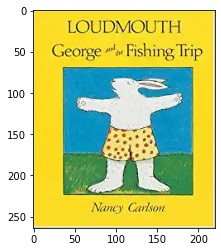

In [36]:
plt.imshow(img)

#### Applying Convolution:

###### Averaging Filter

The **Filter2D** operation convolves an image with the kernel.

- filter2D (src, ddepth, kernel)

src – The source image to apply the filter on.<br/>
ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image] <br/>
kernel – The 2d matrix we want the image to convolve with.

image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0 192 200 ... 190 205   0]
 [  0 200 206 ... 255 198   0]
 ...
 [  0 196 252 ... 255 196   0]
 [  0 210 197 ... 197 205   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
normalize ---------------------
[[ 88. 136. 143. ... 150. 142.  94.]
 [136. 211. 221. ... 231. 217. 143.]
 [143. 221. 231. ... 243. 227. 151.]
 ...
 [152. 231. 241. ... 245. 231. 152.]
 [143. 217. 224. ... 233. 222. 145.]
 [ 95. 143. 149. ... 154. 146.  94.]]
[[ 88. 136. 143. ... 150. 142.  94.]
 [136. 211. 221. ... 231. 217. 143.]
 [143. 221. 231. ... 243. 227. 151.]
 ...
 [152. 231. 241. ... 245. 231. 152.]
 [143. 217. 224. ... 233. 222. 145.]
 [ 95. 143. 149. ... 154. 146.  94.]]
image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0 221 221 ... 184 203   0]
 [  0 221 222 ... 248 197   0]
 ...
 [  0 198 255 ... 251 196   0]
 [  0 217 204 ... 192 208   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
normalize ----

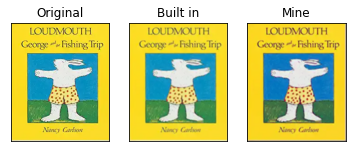

[202 221 179]
[[ 88 136 143 ... 150 142  94]
 [136 211 221 ... 231 217 143]
 [143 221 231 ... 243 227 151]
 ...
 [152 231 241 ... 245 231 152]
 [143 217 224 ... 233 222 145]
 [ 95 143 149 ... 154 146  94]]


In [37]:
kernel = np.ones((3, 3),np.float32)/9
dst1 = cv2.filter2D(img, -1, kernel)
dst2 = filter(img,kernel)
plt.subplot(131)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(dst1)
plt.title('Built in')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(dst2)
plt.title('Mine')
plt.xticks([])
plt.yticks([])
plt.show()

print(dst1[0,0])
print(dst2[:,:,0])

In [38]:
print(dst2[:,:,0])

[[ 88 136 143 ... 150 142  94]
 [136 211 221 ... 231 217 143]
 [143 221 231 ... 243 227 151]
 ...
 [152 231 241 ... 245 231 152]
 [143 217 224 ... 233 222 145]
 [ 95 143 149 ... 154 146  94]]


In [39]:
kernelFive= np.ones((5,5))*1/25
dst = filter(img,kernelFive)
print(dst[:,:,0])

image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 192 ... 205   0   0]
 ...
 [  0   0 210 ... 205   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
normalize ---------------------
[[ 74. 103. 131. ... 134. 106.  77.]
 [103. 141. 180. ... 182. 144. 105.]
 [131. 180. 229. ... 230. 182. 133.]
 ...
 [135. 183. 231. ... 231. 183. 134.]
 [106. 143. 182. ... 183. 145. 107.]
 [ 77. 104. 132. ... 135. 107.  79.]]
[[ 74. 103. 131. ... 134. 106.  77.]
 [103. 141. 180. ... 182. 144. 105.]
 [131. 180. 229. ... 230. 182. 133.]
 ...
 [135. 183. 231. ... 231. 183. 134.]
 [106. 143. 182. ... 183. 145. 107.]
 [ 77. 104. 132. ... 135. 107.  79.]]
image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0 221 ... 203   0   0]
 ...
 [  0   0 217 ... 208   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
normalize ----

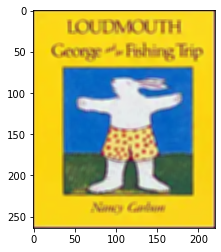

In [40]:
plt.imshow(dst)

image ---------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
convol ---------------------
normalize ---------------------
[[ 71.  91. 111. ... 111.  92.  72.]
 [ 91. 116. 141. ... 141. 116.  91.]
 [111. 141. 171. ... 171. 141. 111.]
 ...
 [112. 142. 172. ... 171. 141. 111.]
 [ 92. 117. 142. ... 141. 116.  92.]
 [ 72.  91. 111. ... 111.  92.  73.]]
[[ 71.  91. 111. ... 111.  92.  72.]
 [ 91. 116. 141. ... 141. 116.  91.]
 [111. 141. 171. ... 171. 141. 111.]
 ...
 [112. 142. 172. ... 171. 141. 111.]
 [ 92. 117. 142. ... 141. 116.  92.]
 [ 72.  91. 111. ... 111.  92.  73.]]
image ---------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
convol ---------------------
normalize ---------------------
[[  3.  29.  56. ...  53.  26.   0.]
 [ 29.  62.  96. ...  94.  60.  27.]
 [ 56.  96. 135. ... 134.  94.  54.]
 ...
 [ 54.  94

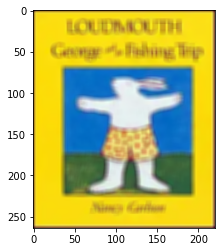

In [41]:
kernelSeven=np.ones((7,7))*1/49
dst = filter(img,kernelSeven)
print(dst[:,:,0])
plt.imshow(dst)

In [11]:
#  Saving image using Open CV
cv2.imwrite('averaging.png', cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

True

#### Increased size of Averaging Filter

In [20]:
kernel = np.ones((10, 10),np.float32)/100
dst1 = cv2.filter2D(img, -1, kernel)
dst2 = filter(img,kernel)

plt.subplot(131)
plt.imshow(img)
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(dst1)
plt.title('Averaging')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(dst2)
plt.title('Averaging by me')
plt.xticks([])
plt.yticks([])


plt.show()

image ---------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


IndexError: index 10 is out of bounds for axis 1 with size 10

#### Further Increased size of Averaging Filter

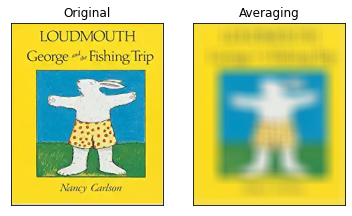

In [7]:
kernel = np.ones((20,20),np.float32)/400
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

#### Sharpening Filter

image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0 192 200 ... 190 205   0]
 [  0 200 206 ... 255 198   0]
 ...
 [  0 196 252 ... 255 196   0]
 [  0 210 197 ... 197 205   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
[[560. 388. 426. ... 406. 280. 637.]
 [388. 190. 216. ... 194. 406. 338.]
 [426. 216. 240. ... 180. 345. 301.]
 ...
 [422. 187. 156. ... 179. 293. 384.]
 [302. 388. 363. ... 324. 379. 312.]
 [657. 338. 271. ... 394. 313. 632.]]
image ---------------------
[[  0   0   0 ...   0   0   0]
 [  0 221 221 ... 184 203   0]
 [  0 221 222 ... 248 197   0]
 ...
 [  0 198 255 ... 251 196   0]
 [  0 217 204 ... 192 208   0]
 [  0   0   0 ...   0   0   0]]
convol ---------------------
[[663. 439. 448. ... 365. 275. 634.]
 [439. 220. 223. ... 179. 392. 344.]
 [448. 223. 238. ... 160. 369. 294.]
 ...
 [402. 183. 159. ... 121. 281. 375.]
 [310. 400. 360. ... 384. 374. 318.]
 [683. 356. 297. ... 303. 313. 652.]]
image ---------------------
[[  0   0   0 ... 

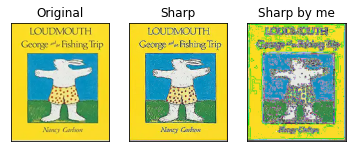

[160 221 255]
[ 48 151 169]


In [30]:
sharpening = np.array([[0, -1,  0],
                       [-1,  5, -1],
                       [0, -1,  0]])
sharp_img1 = cv2.filter2D(img, -1, sharpening)
sharp_img2 = filter(img,sharpening)

plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(sharp_img1),plt.title('Sharp')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(sharp_img2),plt.title('Sharp by me')
plt.xticks([]), plt.yticks([])
plt.show()

print(sharp_img1[0,0])
print(sharp_img2[0,0])


#### Open CV Blur Filter

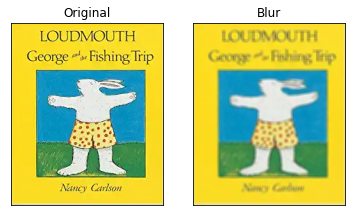

In [15]:
"""
Apply blur using 'blur()' function
"""
img_blur = cv2.blur(src=img, ksize=(5,5)) # Using the blur function to blur an image where ksize is the kernel size

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img_blur),plt.title('Blur')
plt.xticks([]), plt.yticks([])
plt.show()


#### Gaussian Blurring

The effect of Gaussian smoothing is to blur an image, in a similar fashion to the averaging filter. The degree of smoothing is determined by the standard deviation of the Gaussian. The Gaussian outputs a weighted average of each pixel's neighborhood, with the average weighted more towards the value of the central pixels.


OpenCV provides cv2.gaussianblur() function to apply Gaussian Smoothing on the input source image.

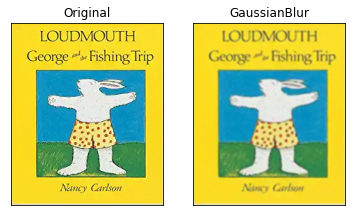

In [16]:
gaussian_blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0, sigmaY=0) # sigmaX and sigmaY, these are the Gaussian kernel standard deviations, in the X (horizontal) and Y (vertical) direction.

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(gaussian_blur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

#### Median Blurring

 In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area.

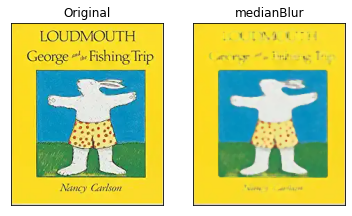

In [17]:
median = cv2.medianBlur(src=img, ksize=5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(median),plt.title('medianBlur')
plt.xticks([]), plt.yticks([])
plt.show()

#### Bilateral Filtering

This technique applies the filter selectively to blur similar intensity pixels in a neighborhood. Sharp edges are preserved

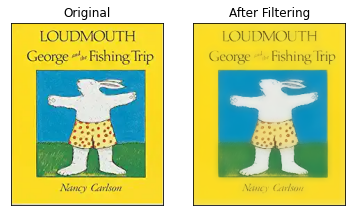

In [18]:
dst = cv2.bilateralFilter(img,18,175,175)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(dst),plt.title('After Filtering')
plt.xticks([]), plt.yticks([])
plt.show()